In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [16]:
os.chdir('/home/sidrah19220/nmd/loomfiles/randomization/wild/euclidean')

In [17]:
eud = pd.read_csv('matrix-1-euclidean-correlation.csv', index_col =0)
exp = pd.read_csv('matrix-5-Expression.csv', index_col = 0)

FINDING MATURE - IMMATURE PAIR OF ORs 

In [18]:
ors=list(exp.columns.values.tolist())
cells=exp.index.values
#exp.index = cells
tr_exp=exp.T

In [19]:
all_ors={}
zero_exp=[]
for cell in cells:
  all_ors[cell]=[]
  cell_exps=sorted(tr_exp[cell].tolist(), reverse=True)
  if cell_exps[0]>0:
    if tr_exp[cell].tolist().count(max(cell_exps)) > 8:
      for i in range(tr_exp[cell].tolist().count(max(tr_exp[cell]))):
        all_ors[cell].append(tr_exp.sort_values(by=cell, ascending=False).index[i])
    else:
      for i in range(8):
        if cell_exps[i]>0:
          all_ors[cell].append(tr_exp.sort_values(by=cell, ascending=False).index[i])
  else:
    zero_exp.append(cell)

In [20]:
cell_imt={}
cell_imm={}
cell_mat={}
for key,value in all_ors.items():
  if key.startswith("IMT"):
    cell_imt[key]=[]
    for val in value:
      if val.startswith("Olfm"):
        continue
      else:
        cell_imt[key].append(val)
  if key.startswith("MA"):
    cell_mat[key]=[]
    for val in value:
      if val.startswith("Olfm"):
        continue
      else:
        cell_mat[key].append(val)
  if key.startswith("IMM"):
    for val in value:
      cell_imm[key]=[]
      if val.startswith("Olfm"):
        continue
      else:
        cell_imm[key].append(val)


In [7]:
import random
random_cell={}
for key,values in cell_mat.items():
    if len(values)==0:
        continue
    else:
        random_cell[key]=values
len(random_cell.keys())

1559

In [21]:
cell_imm_imt={}
for key,value in all_ors.items():
  if key.startswith("IM"):
    cell_imm_imt[key]=[]
    for val in value:
      if val.startswith("Olfm"):
        continue
      else:
        cell_imm_imt[key].append(val)

In [22]:
di1={}
for key,value in cell_imm_imt.items():
  di2={}
  if len(value)<1:
    continue
  else:
    for val in value:
      di2[val]=tr_exp[key][val]
    di1[key]=di2

In [29]:
#for additional point4 to extract unique number of paired immature and transition
''''lis=[]
for key in di1.keys(): 
        lis.append(key)

In [35]:
''''tran =0
imm = 0
trans=[]
immat =[]
for k in lis:
    if k.startswith('IMT'):
        if k not in trans:
            trans.append(k)
            tran = tran+1
    if k.startswith('IMMA'):
        if k not in immat:
            immat.append(k)
            imm = imm +1

In [41]:
tran

214

In [42]:
len(trans)

214

In [43]:
imm

261

In [10]:
with open("Out_data_eud.csv","w")as fout:
  fout.write("Olfactory Receptor,Mature Cell ID,Immature/Transition Cell ID, ED,Dist. Rank,Receptor Expression Rank,Receptor Expression,Expression Diffrence from rank1\n")
  empty_mat=[]
  mat_cell=eud.index
  imm_imt_cells=list(eud.columns.values.tolist())
  for i in range(len(mat_cell)):
    mat1={}
    for j in range(len(imm_imt_cells)):
      mat1[eud.iloc[i][j]]=imm_imt_cells[j]
    euds=sorted(mat1.keys(), reverse=False)
    for j in range(len(euds)):
      if len(cell_mat[mat_cell[i]])==0:
        empty_mat.append(mat_cell[i])
      else:
        if cell_mat[mat_cell[i]][0] in cell_imm_imt[mat1[euds[j]]]:
          for k in range(len(cell_imm_imt[mat1[euds[j]]])):
            if cell_imm_imt[mat1[euds[j]]][k]==cell_mat[mat_cell[i]][0]:
              #print(cell_imm_imt[mat1[euds[j]]][k],mat_cell[i],mat1[euds[j]],euds[j],k,di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])
              fout.write(str(cell_imm_imt[mat1[euds[j]]][k])+','+str(mat_cell[i])+','+str(mat1[euds[j]])+','+str(euds[j])+','+str(j)+','+str(k)+','+str(di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])+','+str((di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][0]])-di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])+'\n')

Finding different quantiles

In [11]:
eu = eud

In [12]:
li = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for ki in li:
    q = eu.quantile(ki , axis = 1)
    q1 = q.tolist()
    qq = pd.DataFrame(q)

    idd = eu.index.tolist()
    ccl = eu.columns.tolist()
    d4=dict.fromkeys(idd)

    #loop to generate imm cells
    k = []
    for i in range(len(idd)):
        for j in range(len(ccl)):
            if eu.iloc[i][j] < q1[i]:
                k.append(ccl[j])
        d4[idd[i]] = k
        k=[]

    p = []
    for i in idd:
        p.append(len(d4[i]))
    cells = pd.DataFrame.from_dict(d4, orient='index')
    cells.to_csv(str(ki)+'percentile_euc_total_immature.csv')

READING PERCENTILE FILES AND INTERSECTION

In [13]:
p1 = pd.read_csv('0.01percentile_euc_total_immature.csv', index_col = 0)
p2 = pd.read_csv('0.02percentile_euc_total_immature.csv', index_col = 0)
p5 = pd.read_csv('0.05percentile_euc_total_immature.csv', index_col=0)
p10 = pd.read_csv('0.1percentile_euc_total_immature.csv', index_col =0)
p20 = pd.read_csv('0.2percentile_euc_total_immature.csv', index_col =0)
p30 = pd.read_csv('0.3percentile_euc_total_immature.csv', index_col =0)
p50 = pd.read_csv('0.5percentile_euc_total_immature.csv', index_col =0)
p60 = pd.read_csv('0.6percentile_euc_total_immature.csv', index_col =0)
p70 = pd.read_csv('0.7percentile_euc_total_immature.csv', index_col =0)
p80 = pd.read_csv('0.8percentile_euc_total_immature.csv', index_col =0)
p90 = pd.read_csv('0.9percentile_euc_total_immature.csv', index_col =0)
p100 = pd.read_csv('1percentile_euc_total_immature.csv', index_col =0)

In [23]:
o = pd.read_csv('Out_data_eud.csv')

In [15]:
dictt={}
v =  o['Mature Cell ID'].tolist()
v2 = o['Immature/Transition Cell ID'].tolist()
for indx in range(len(v)):
    if v[indx]==v[indx-1]:
        dictt[v[indx]].append(v2[indx])
    else:
        dictt[v[indx]]=[]
        dictt[v[indx]].append(v2[indx])

In [16]:
ke=[]
for key in dictt:
    ke.append(key)
pp1 = p1.loc[ke].T
pp2 = p2.loc[ke].T
pp5 = p5.loc[ke].T
pp10 = p10.loc[ke].T
pp20 = p20.loc[ke].T
pp30 = p30.loc[ke].T
pp50 = p50.loc[ke].T
pp60 = p60.loc[ke].T
pp70 = p70.loc[ke].T
pp80 = p80.loc[ke].T
pp90 = p90.loc[ke].T
pp100 = p100.loc[ke].T

In [50]:
ppp1 = pp100.to_dict('list')

In [51]:
dup = pd.read_csv('Out_data_eud.csv')
stat=[]
for i in range(0,len(dup['Immature/Transition Cell ID'])):
    if dup['Immature/Transition Cell ID'][i] in ppp1[dup['Mature Cell ID'][i]]:
        stat.append('Positive')
    else:
        stat.append('Negative')
        
dup['status'] = stat
#dup.to_csv('Final_spl_10q.csv')
dup.to_csv('1percentile_neg_pos_out_data.csv')

In [52]:
euk = dup[(dup['status']=='Positive') & (dup['Expression Diffrence from rank1']==0)]
euk.to_csv('1_final_res.csv')

# AFTER BOXPLOT DATA

In [53]:
DF4=pd.DataFrame()

Calculating xa

In [105]:
x = pd.read_csv('0.02_final_res.csv', index_col = 0)
o = pd.read_csv('Out_data_eud.csv', index_col =0)
eu = pd.read_csv('matrix-1-euclidean-correlation.csv', index_col =0)
mat_uniq = eu.index.tolist()
dictt={}
v =  x['Mature Cell ID'].tolist()
v2 = x['Immature/Transition Cell ID'].tolist()

for indx in range(len(v)):
    if v[indx]==v[indx-1]:
        
        dictt[v[indx]].append(v2[indx])
    else:
        dictt[v[indx]]=[]
        dictt[v[indx]].append(v2[indx])
xa_dict={}
for ma in mat_uniq:
    if ma in dictt.keys():
        xa_dict[ma]=len(dictt[ma])
    else:
        xa_dict[ma]=0
df2 = pd.DataFrame.from_dict(xa_dict, orient='index')
print(df2.value_counts())

0    2486
1       4
dtype: int64


CALCULATING X

In [106]:
pos_neg = pd.read_csv('0.02percentile_neg_pos_out_data.csv')
pos_neg2 = pos_neg[pos_neg['status'] == 'Positive']
dictt2={}
v =  pos_neg2['Mature Cell ID'].tolist()
v2 = pos_neg2['Immature/Transition Cell ID'].tolist()

for indx in range(len(v)):
    if v[indx]==v[indx-1]:
        
        dictt2[v[indx]].append(v2[indx])
    else:
        dictt2[v[indx]]=[]
        dictt2[v[indx]].append(v2[indx])
        
x_dict={}
for ma in mat_uniq:
    if ma in dictt2.keys():
        x_dict[ma]=len(dictt2[ma])
    else:
        x_dict[ma]=0
        
df3 = pd.DataFrame.from_dict(x_dict, orient='index')
print(df3.value_counts())
df3.columns = ['x']

0    2484
1       6
dtype: int64


CALCULATING Y

In [107]:
percentile = pd.read_csv('0.02percentile_euc_total_immature.csv', index_col =0)
xny=len(percentile.columns.values.tolist())
print(xny)
if len(percentile.index.values.tolist())==len(df3):
    df3['y'] = xny - df3['x'] 
xa = df2[0].values.tolist()
df3['xa'] = xa
df3['xay'] = df3['xa']/df3['y']
df3.to_csv('2percentile_boxplot.csv')


9


In [102]:
DF4['100p']=df3['xay']

In [811]:
#DF4 = DF4.drop(['90P'], axis =1)

# SAVING BOXPLOT FILE FINALLY

In [108]:
DF4.to_csv('plot_boxplot_euclidean.csv')

<AxesSubplot:>

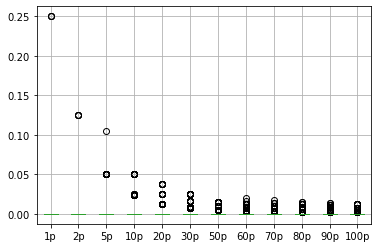

In [109]:
DF4.boxplot()

In [110]:
p  = o.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')['Mature Cell ID'].tolist()

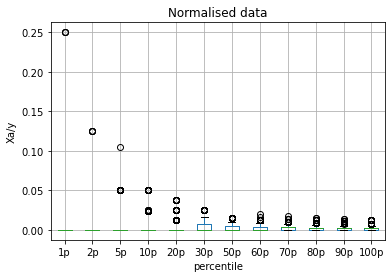

In [111]:
DF4.loc[p].boxplot()
plt.xlabel('percentile')
plt.ylabel('Xa/y')
plt.title('Normalised data')
plt.savefig('normalised_data_euclidean.pdf')

In [24]:
o_unique = o.drop_duplicates(subset = 'Mature Cell ID', keep ='first')
mat_uniq= o_unique['Mature Cell ID'].values.tolist()

In [113]:
dictt={}
v =  o['Mature Cell ID'].tolist()
v2 = o['Immature/Transition Cell ID'].tolist()

for indx in range(len(v)):
    if v[indx]==v[indx-1]:
        
        dictt[v[indx]].append(v2[indx])
    else:
        dictt[v[indx]]=[]
        dictt[v[indx]].append(v2[indx])

In [5]:
f1 = pd.read_csv('0.01_final_res.csv')
f2 = pd.read_csv('0.02_final_res.csv')
f5 = pd.read_csv('0.05_final_res.csv')
f10 = pd.read_csv('0.1_final_res.csv')
f20 = pd.read_csv('0.2_final_res.csv')
f30 = pd.read_csv('0.3_final_res.csv')
f50 = pd.read_csv('0.5_final_res.csv')
f60 = pd.read_csv('0.6_final_res.csv')
f70 = pd.read_csv('0.7_final_res.csv')
f80 = pd.read_csv('0.8_final_res.csv')
f90 = pd.read_csv('0.9_final_res.csv')
f100 = pd.read_csv('1_final_res.csv')


In [6]:
liii=[f1, f2, f5, f10, f20, f30, f50, f60, f70, f80, f90, f100]
valss=[]
for i in liii:
    valss.append(len(i))

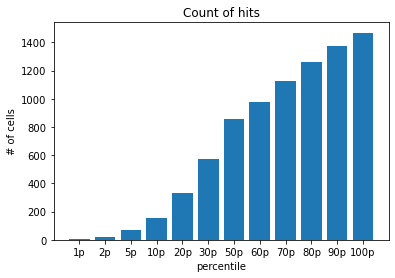

In [7]:
x = ['1p', '2p', '5p', '10p', '20p', '30p', '50p', '60p', '70p', '80p', '90p', '100p']
plt.bar(x,valss)
plt.title('Count of hits')
plt.xlabel('percentile')
plt.ylabel('# of cells')
plt.savefig('number of hits euclidean.pdf')

UNIQUE COUNT GRAPH

In [8]:
unique_f1 = f1.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
unique_f2 = f2.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
unique_f5 = f5.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
unique_f10 = f10.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
unique_f20 = f20.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
unique_f30 = f30.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
unique_f50 = f50.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
unique_f60 = f60.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
unique_f70 = f70.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
unique_f80 = f80.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
unique_f90 = f90.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
unique_f100 = f100.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')


In [9]:
len(unique_f1)

4

In [10]:
liii=[unique_f1, unique_f2, unique_f5, unique_f10, unique_f20, unique_f30, unique_f50, unique_f60, unique_f70, unique_f80,
      unique_f90, unique_f100]
valss_unique=[]
for i in liii:
    valss_unique.append(len(i))

In [14]:
valss_unique

[4, 20, 60, 123, 239, 309, 439, 504, 561, 612, 656, 693]

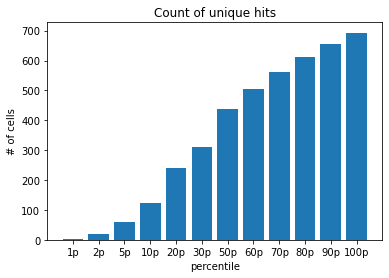

In [11]:
x = ['1p', '2p', '5p', '10p', '20p', '30p', '50p', '60p', '70p', '80p', '90p', '100p']
plt.bar(x,valss_unique)
plt.title('Count of unique hits')
plt.xlabel('percentile')
plt.ylabel('# of cells')
plt.savefig('number of unique hits euclidean.pdf')

In [12]:
valssf=[]
for v in valss_unique:
    valssf.append((v/1559)*100)

In [13]:
valssf

[0.2565747273893521,
 1.2828736369467608,
 3.8486209108402822,
 7.889672867222579,
 15.330339961513792,
 19.820397690827456,
 28.159076330981396,
 32.32841565105837,
 35.98460551635664,
 39.25593329057088,
 42.07825529185375,
 44.451571520205256]

([<matplotlib.axis.YTick at 0x7f7a3c1532e0>,
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50')])

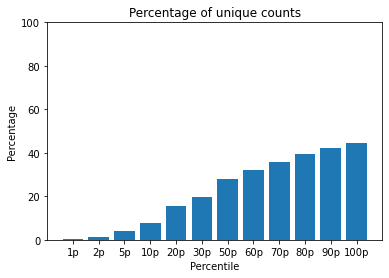

In [54]:
plt.bar(x,valssf)
plt.title('Percentage of unique counts')
plt.xlabel('Percentile')
plt.ylabel('Percentage')
plt.savefig('percentage')
plt.yticks([0, 20, 40, 60, 80, 100])

LAST GRAPH

In [55]:
list1 = [unique_f1, unique_f2, unique_f5, unique_f10, unique_f20, unique_f30, unique_f50, unique_f60, unique_f70, 
         unique_f80, unique_f90, unique_f100]

In [56]:
graph1 =[]
for mature_cell in list1:
    graph1.append(len(mature_cell)/(1559-len(mature_cell)))

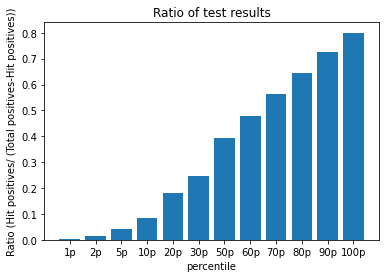

In [63]:
xaxis = ['1p', '2p', '5p','10p', '20p', '30p', '50p', '60p', '70p', '80p', '90p', '100p']
plt.bar(xaxis,graph1)
plt.title('Ratio of test results')
plt.xlabel('percentile')
plt.ylabel('Ratio (Hit positives/ (Total positives-Hit positives))')
plt.savefig('ratio graph.pdf')

In [65]:
graph1

[0.002572347266881029,
 0.01299545159194282,
 0.0400266844563042,
 0.08565459610027855,
 0.18106060606060606,
 0.2472,
 0.3919642857142857,
 0.4777251184834123,
 0.5621242484969939,
 0.6462513199577613,
 0.7264673311184939,
 0.8002309468822171]

% graph

In [58]:
list2 = graph1
graph2 =[]
for mature_cell in list2:
    graph2.append((mature_cell/1559)*100)

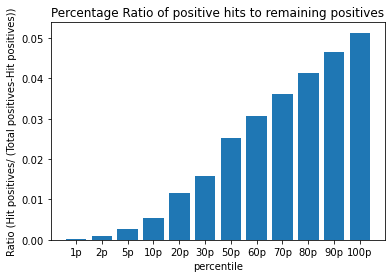

In [59]:
xaxis = ['1p', '2p', '5p','10p', '20p', '30p', '50p', '60p', '70p', '80p', '90p', '100p']
plt.bar(xaxis,graph2)
plt.title('Percentage Ratio of positive hits to remaining positives')
plt.xlabel('percentile')
plt.ylabel('Ratio (Hit positives/ (Total positives-Hit positives))')
plt.savefig('ratio graph percentage.pdf')